In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from warnings import filterwarnings as fw
fw('ignore')

In [3]:
df=pd.read_csv('fraud_oracle.csv')

## Data_Exploration

In [4]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
df.shape

(15420, 33)

There are 15420 rows, 33 columns.

In [6]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [8]:
for i in df.columns:
    print(i,df[i].value_counts())
    print('='*60)

Month Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64
WeekOfMonth 3    3640
2    3558
4    3398
1    3187
5    1637
Name: WeekOfMonth, dtype: int64
DayOfWeek Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64
Make Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64
AccidentArea Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64
DayOfWeekClaimed Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday 

## Statistical Summary

In [9]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


## Missing_values

In [10]:
null=pd.DataFrame({'Columns':df.columns,'null_values':df.isnull().sum(),'null_value_percentage':(df.isnull().sum()/len(df))*100})

In [11]:
null

,Columns,null_values,null_value_percentage
Month,Month,0,0.0
WeekOfMonth,WeekOfMonth,0,0.0
DayOfWeek,DayOfWeek,0,0.0
Make,Make,0,0.0
AccidentArea,AccidentArea,0,0.0
DayOfWeekClaimed,DayOfWeekClaimed,0,0.0
MonthClaimed,MonthClaimed,0,0.0
WeekOfMonthClaimed,WeekOfMonthClaimed,0,0.0
Sex,Sex,0,0.0
MaritalStatus,MaritalStatus,0,0.0


As we can see there are 0 null values in the data.

In [12]:
#seperating categorical as well as numerical for analysis

## Univariate Analysis

In [13]:
cat_cols=df.select_dtypes(exclude=np.number).columns.to_list()

In [14]:
cat_cols

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [15]:
len(cat_cols)

24

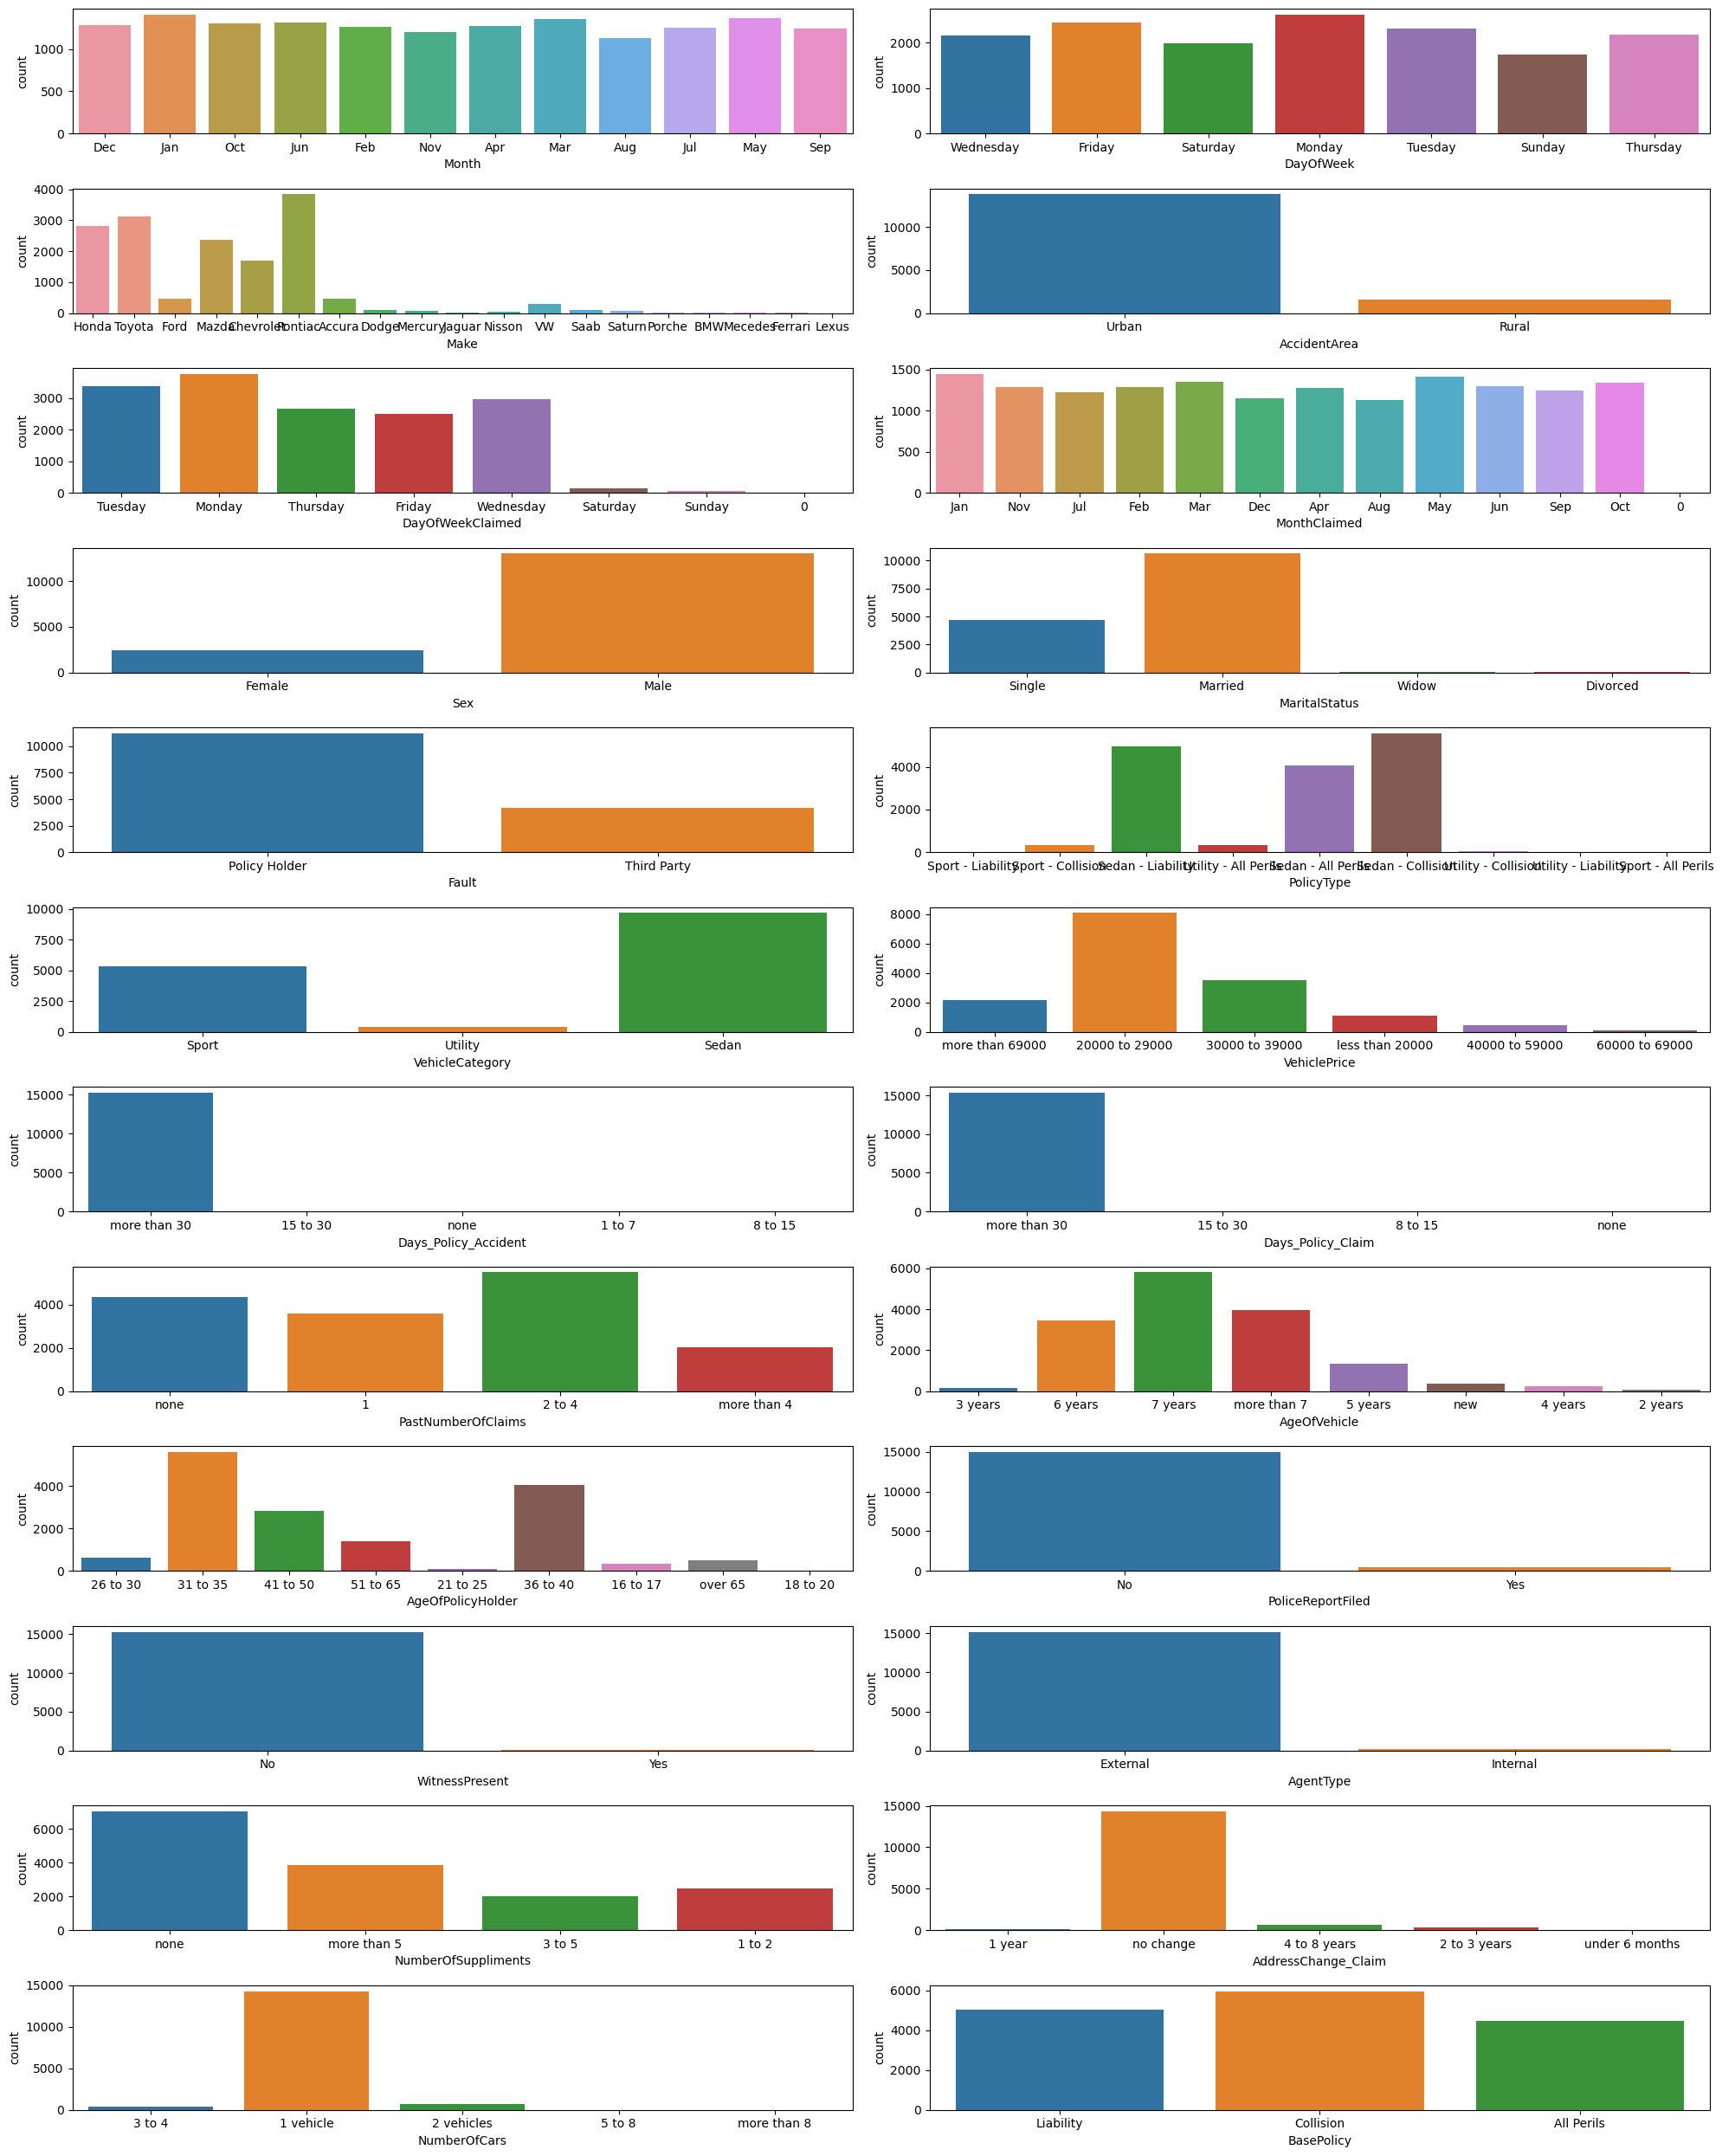

In [16]:
f,ax=plt.subplots(12,2,figsize=(20,25))
for i,v in zip(cat_cols,ax.flatten()):
    sns.countplot(df[i],ax=v)
    plt.tight_layout()
plt.show()

In [17]:
num_cols=df.select_dtypes(include=np.number).columns.to_list()

In [18]:
len(num_cols)

9

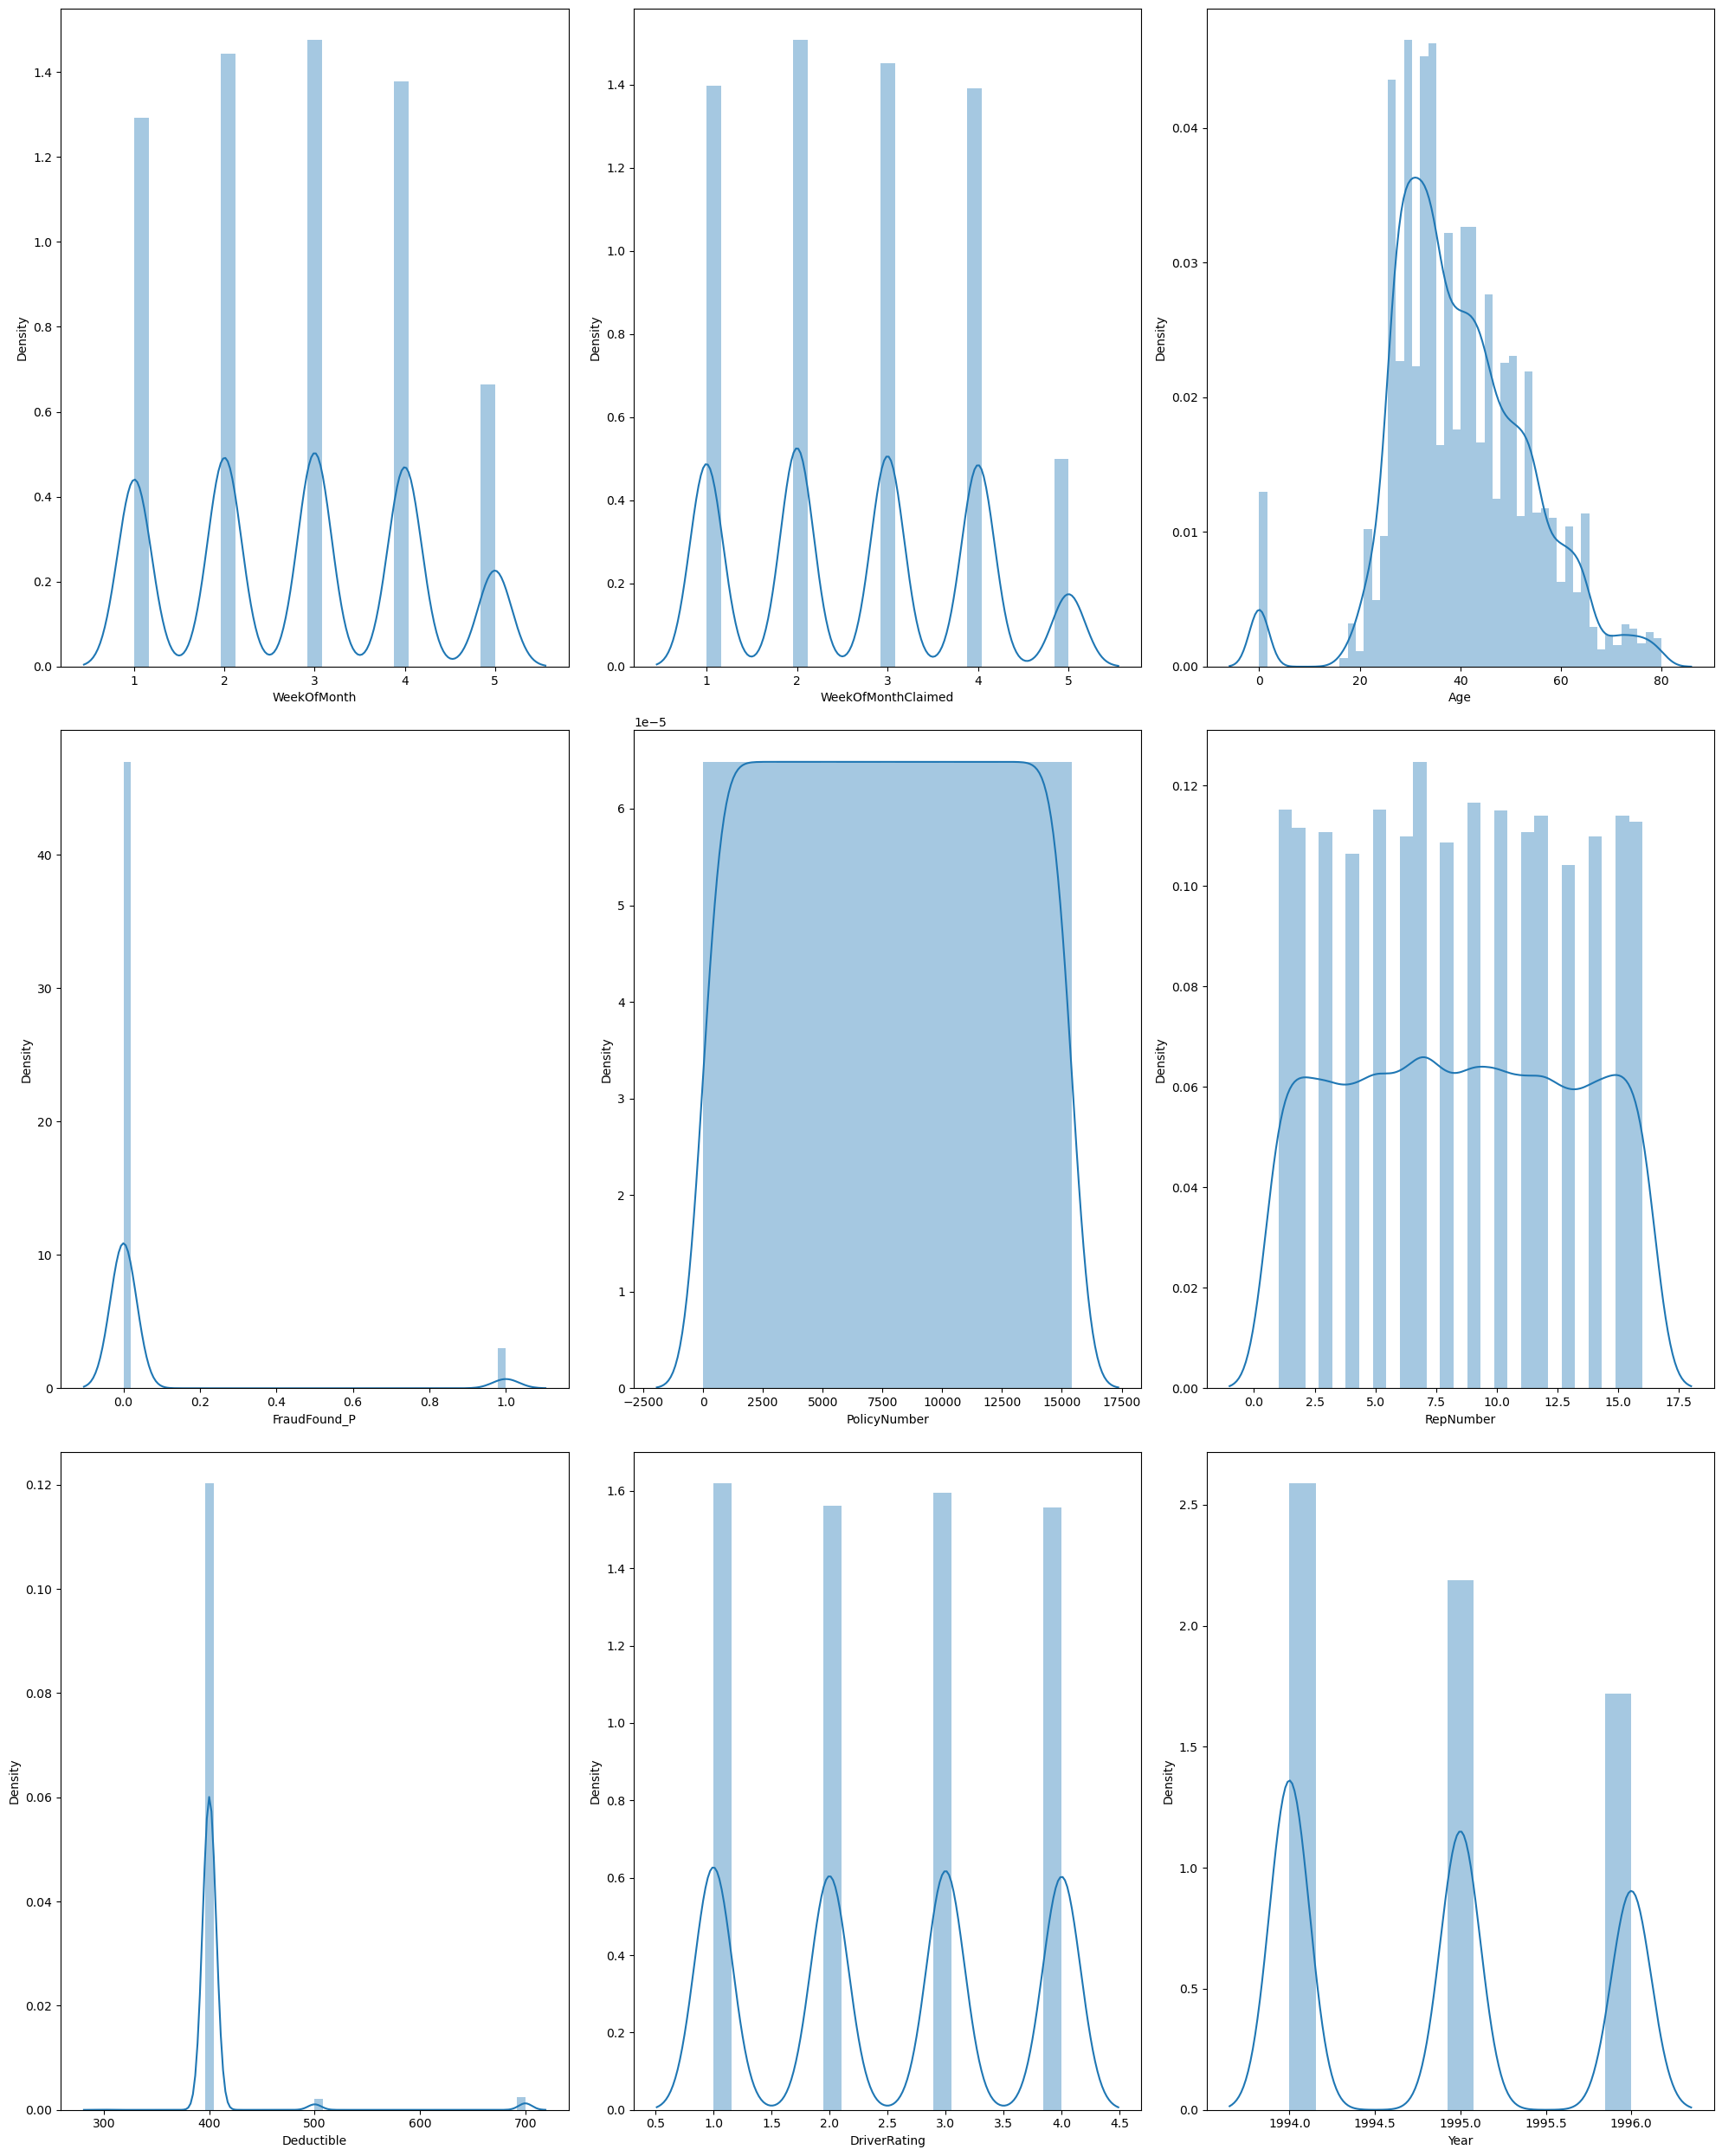

In [19]:
f,ax=plt.subplots(3,3,figsize=(20,25))
for i,v in zip(num_cols,ax.flatten()):
    sns.distplot(a=df[i],ax=v)
    plt.tight_layout()
plt.show()

## Bivariate Analysis

As my target variable is fraudFound_p i would compare my other features with it

In [20]:
num_cols.remove('FraudFound_P')

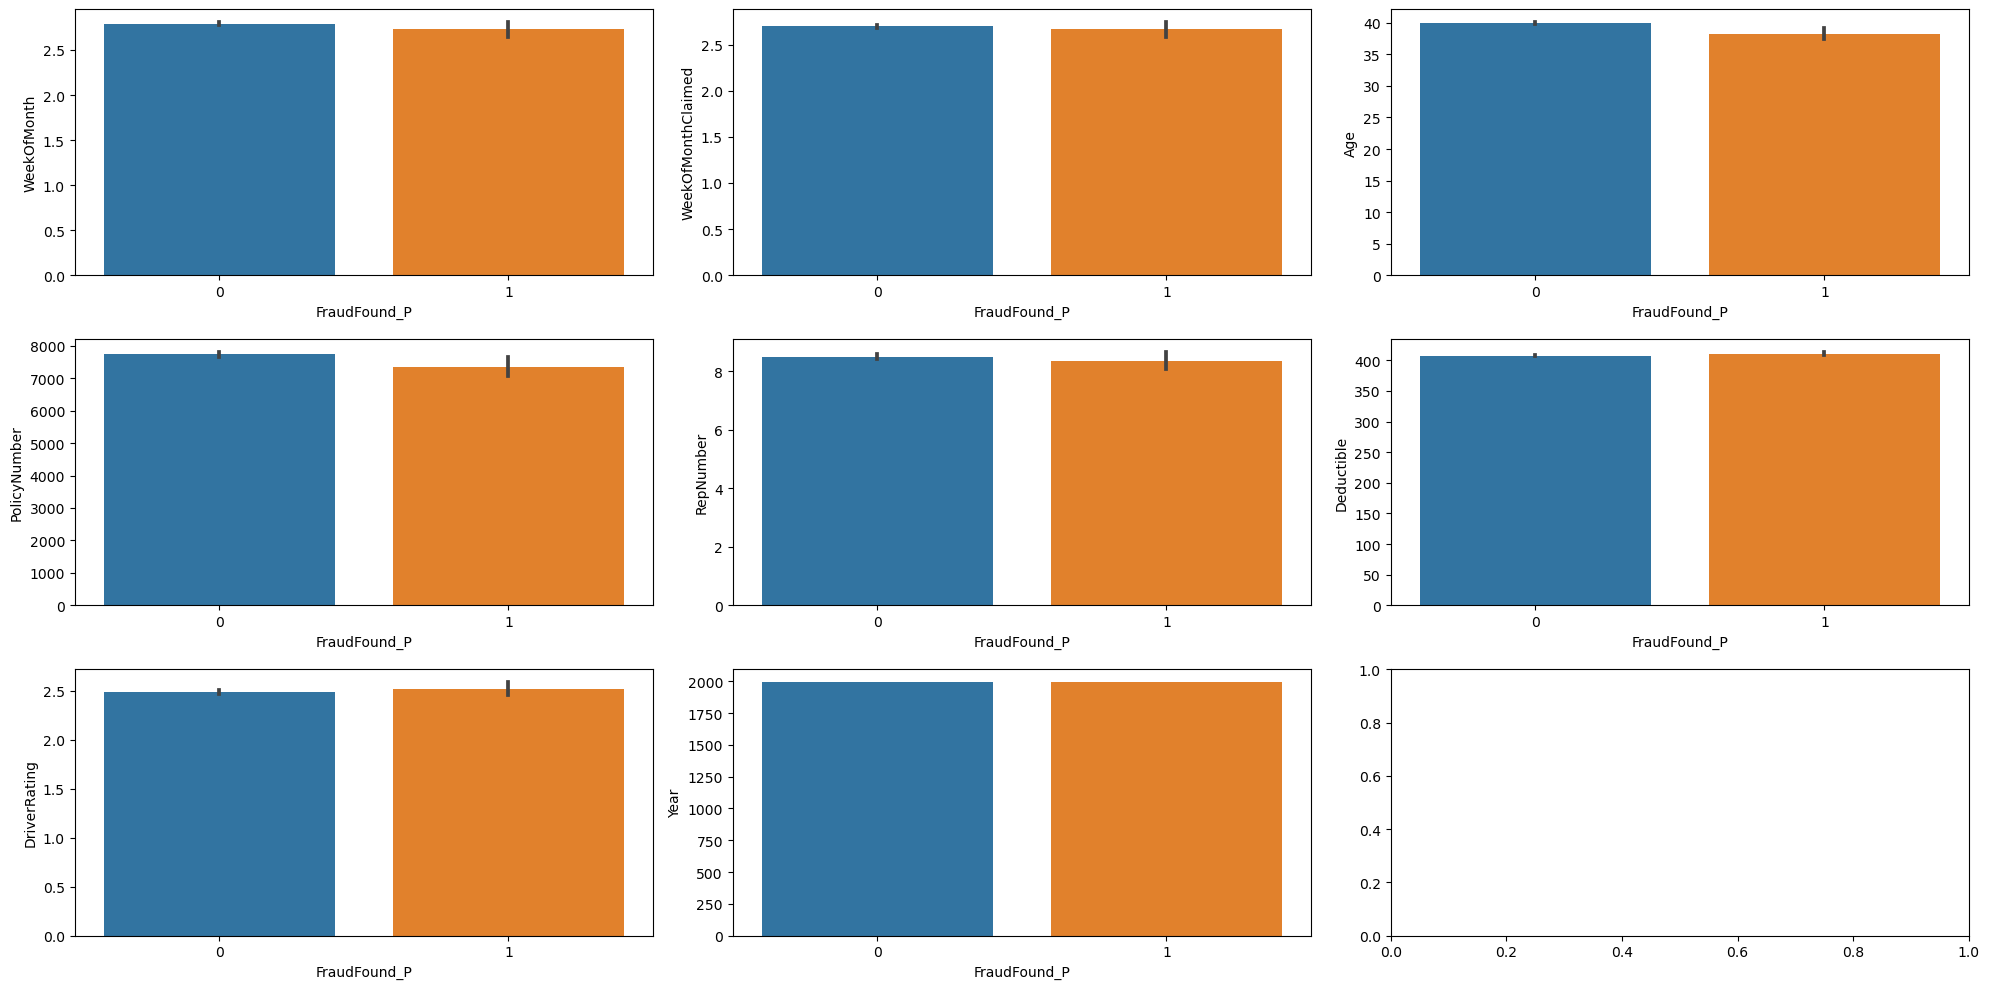

In [21]:
f,ax=plt.subplots(3,3,figsize=(20,10))
for i,v in zip(num_cols,ax.flatten()):
    sns.barplot(x=df['FraudFound_P'],y=df[i],ax=v)
    plt.tight_layout()
plt.show()

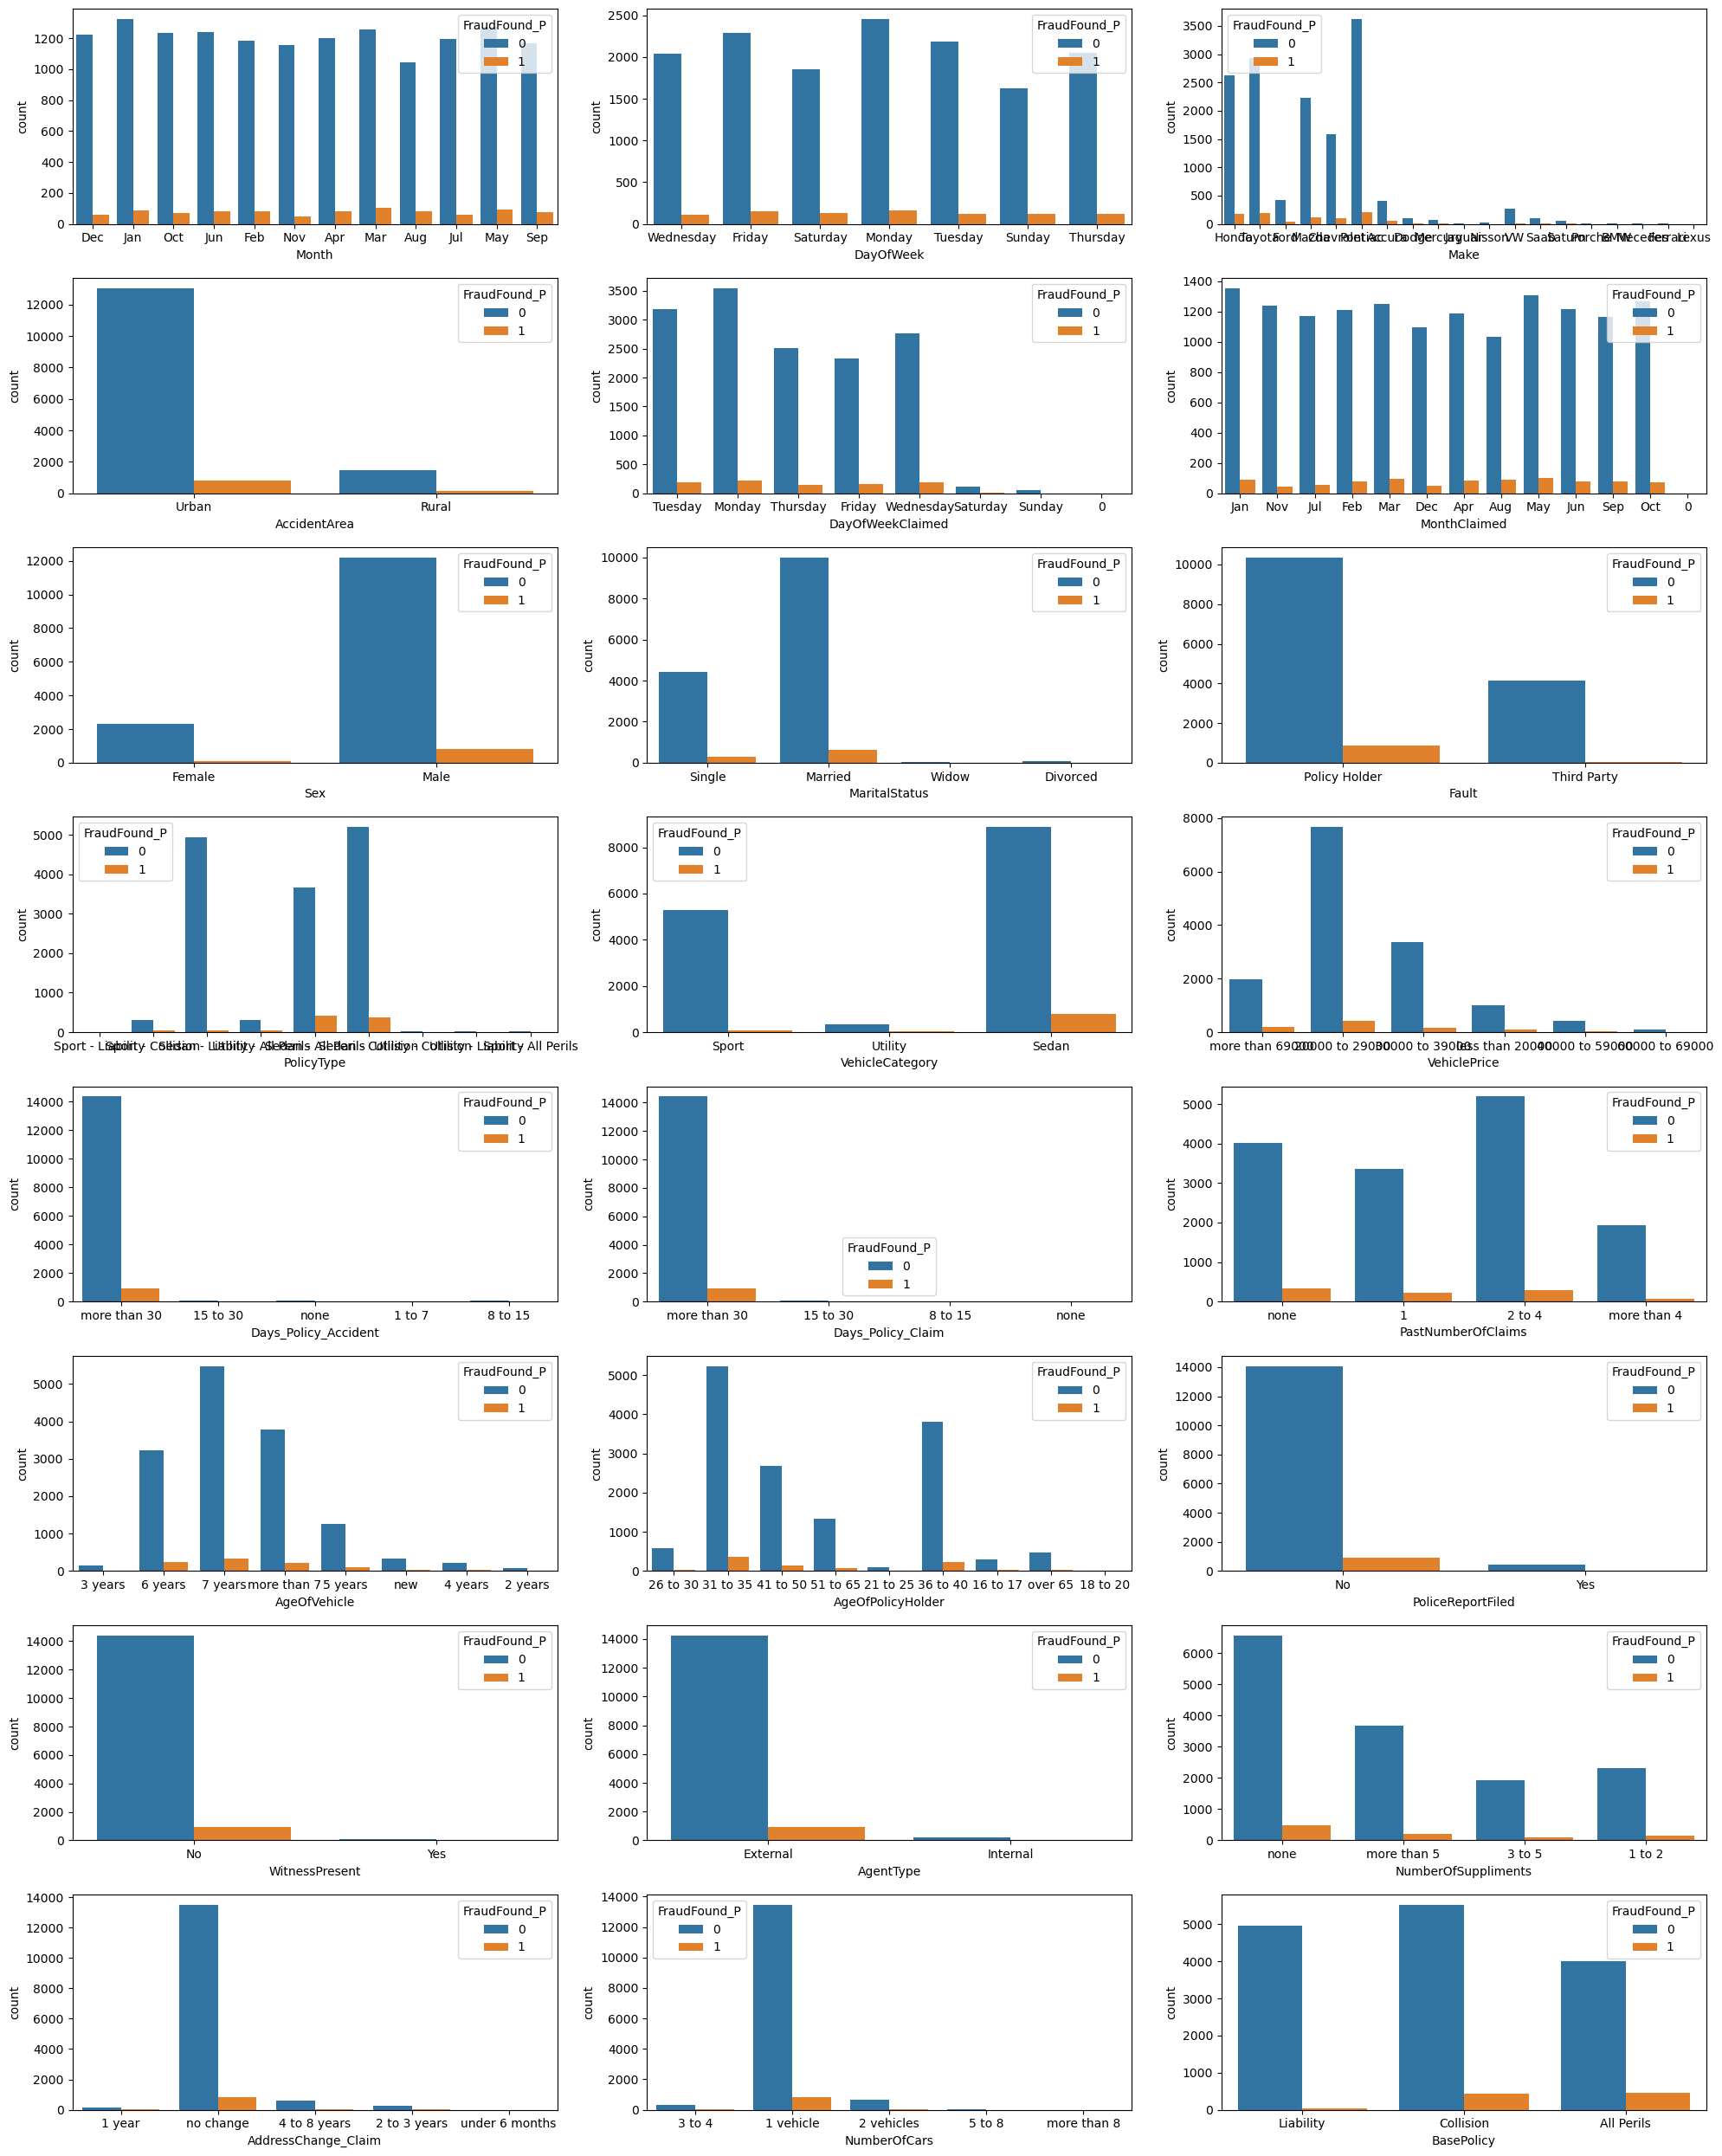

In [22]:
f,ax=plt.subplots(8,3,figsize=(20,25))
for i,v in zip(cat_cols,ax.flatten()):
    sns.countplot(x=df[i],hue=df['FraudFound_P'],ax=v)
    plt.tight_layout()
plt.show()

## Multivariate analysis


In [23]:
corr=df.corr()

<AxesSubplot:>

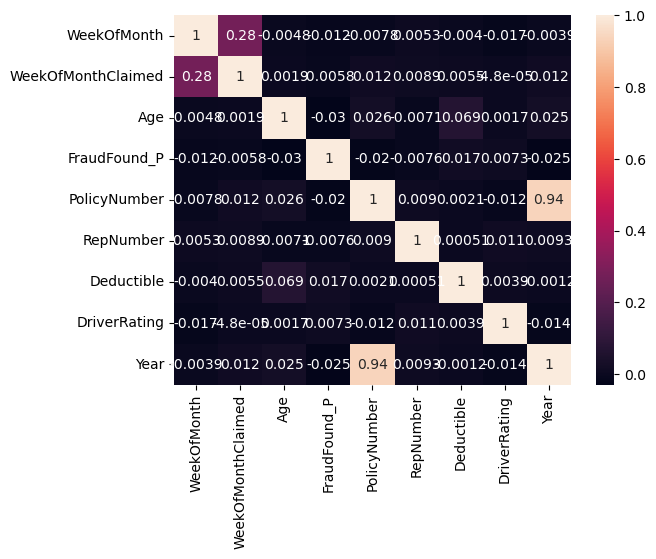

In [24]:
sns.heatmap(corr,annot=True)

The correlation between policy number and year is pretty much higher which is 0.94.

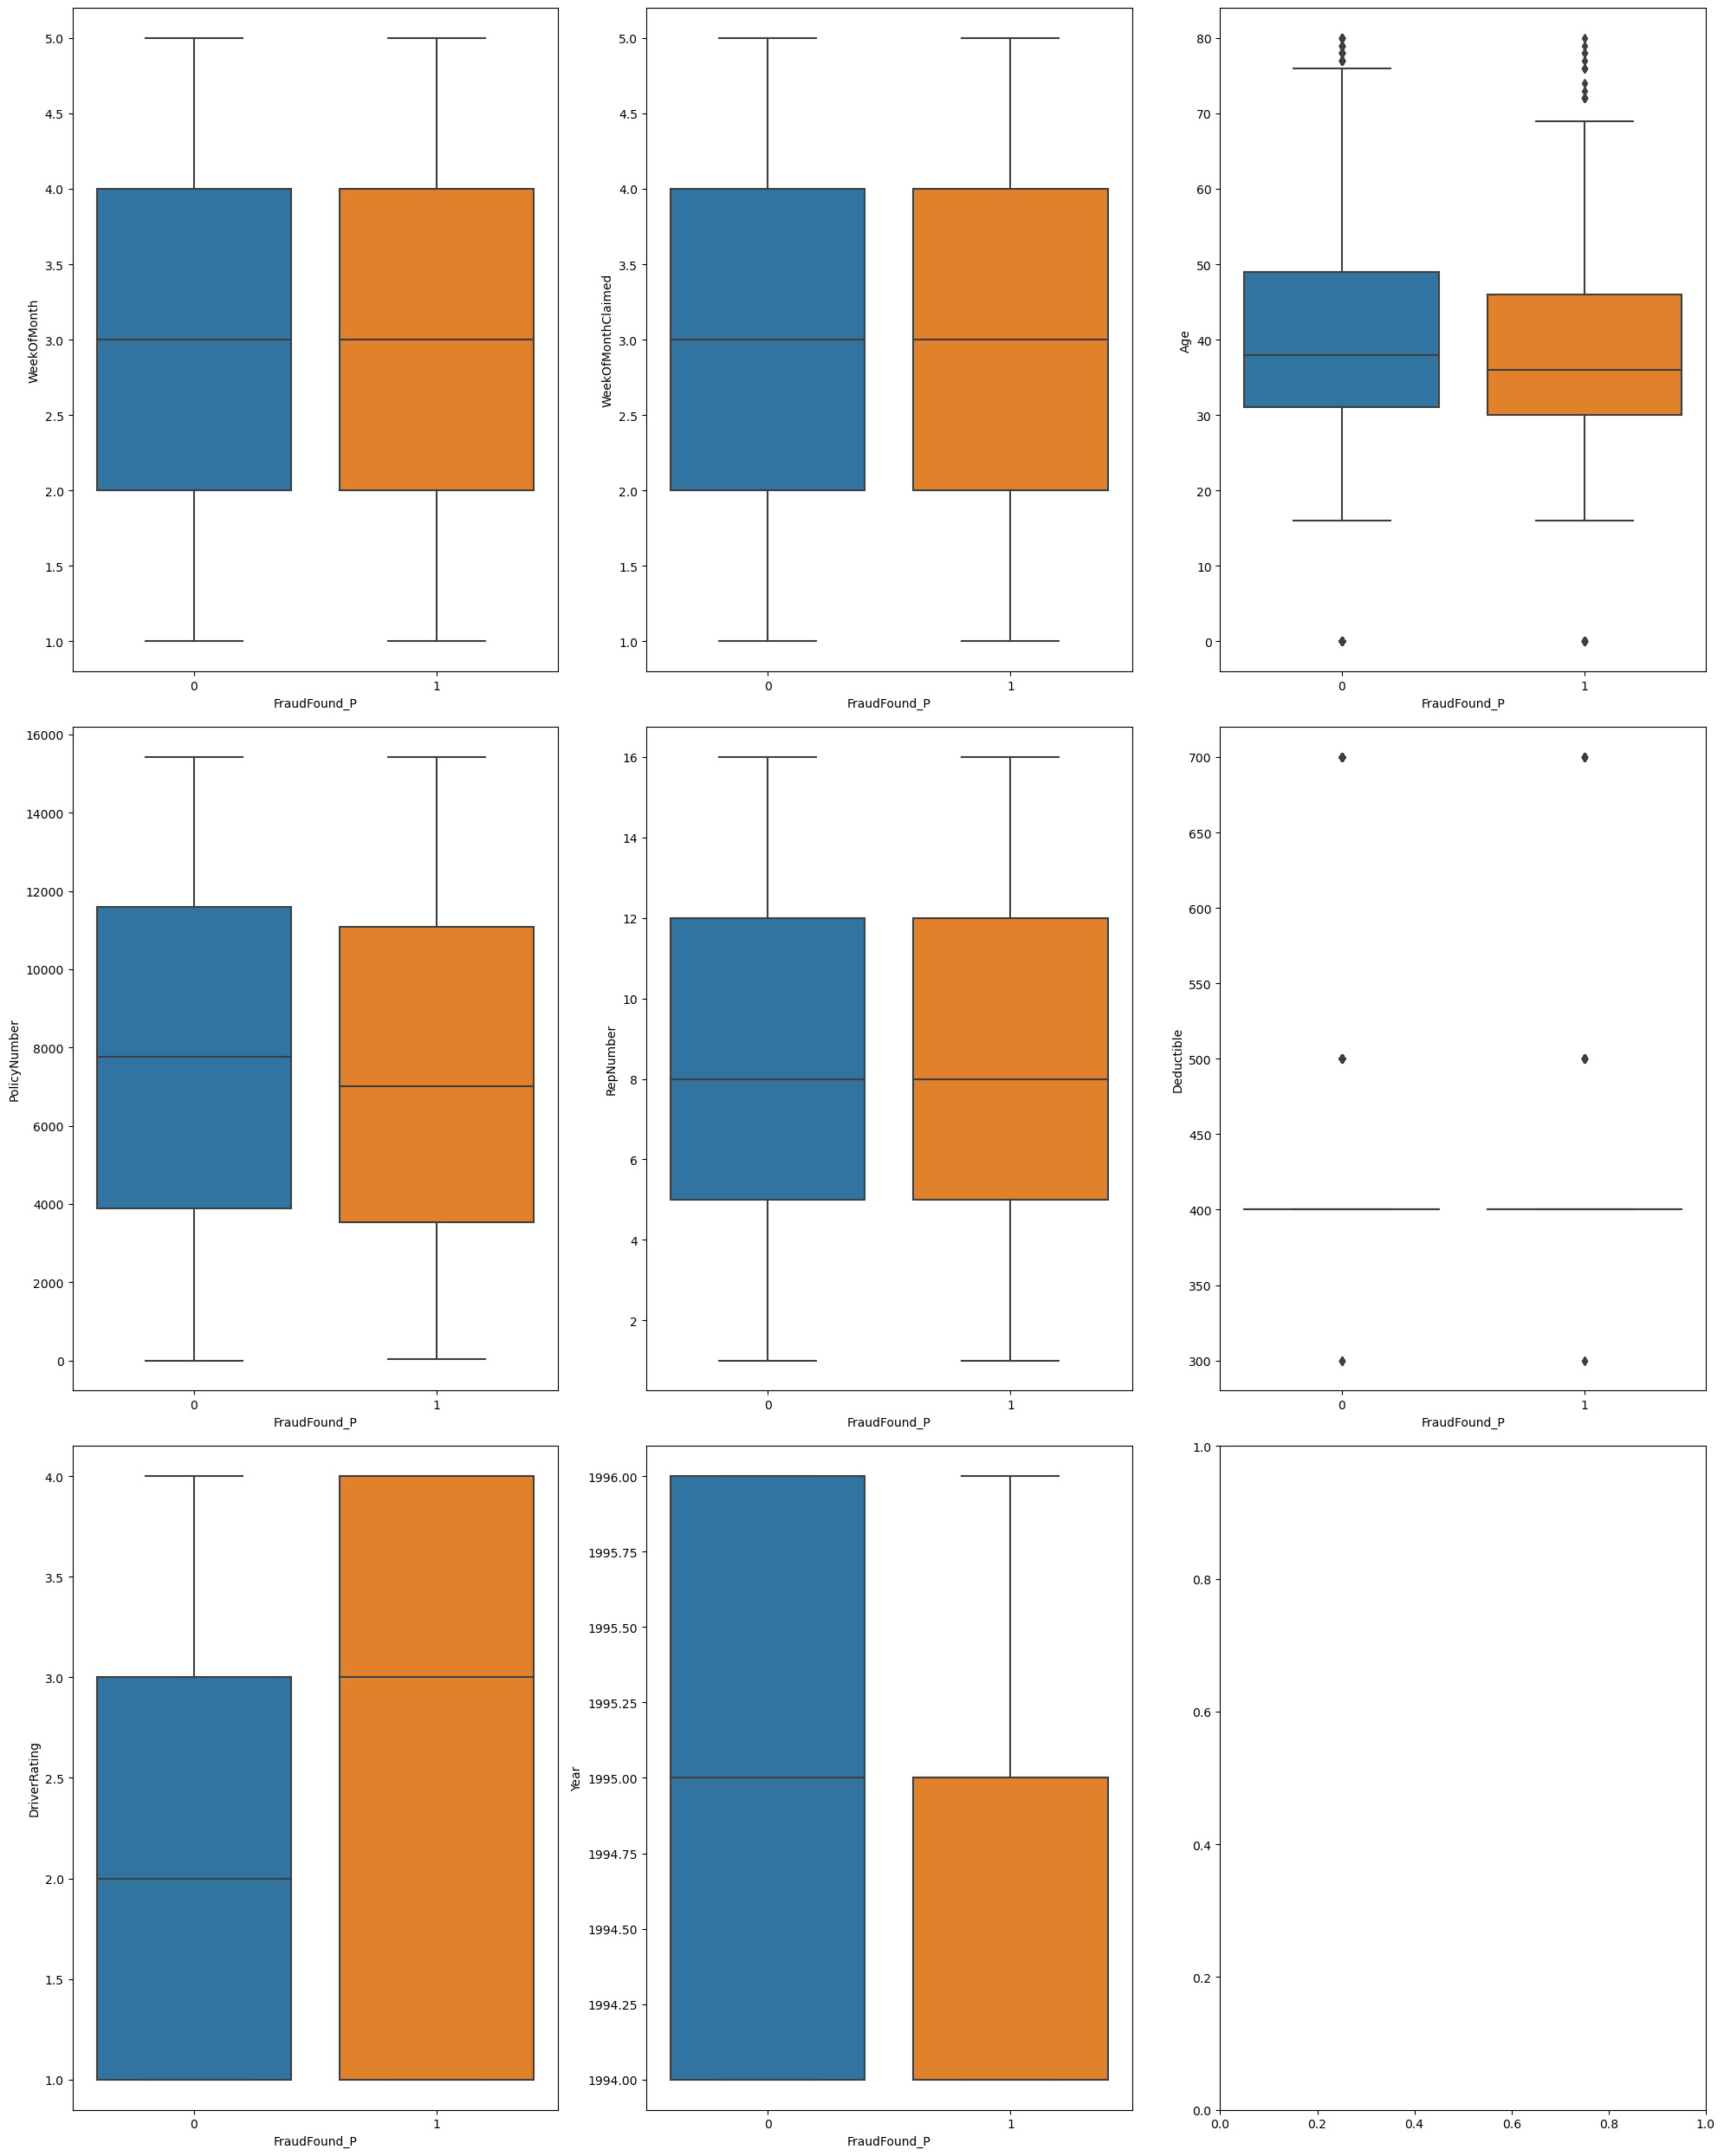

In [25]:
f,ax=plt.subplots(3,3,figsize=(20,25))
for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(x=df['FraudFound_P'],y=df[i],ax=v)
    plt.tight_layout()
plt.show()

In [26]:
q1 =df.quantile(0.25)
q3= df.quantile(0.75)
iqr=q3-q1

upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr

In [27]:
df_outliers=df[((df>upper_limit)|(df<lower_limit))]

In [28]:
upper_limit

WeekOfMonth               7.0
WeekOfMonthClaimed        7.0
Age                      73.5
FraudFound_P              0.0
PolicyNumber          23129.5
RepNumber                22.5
Deductible              400.0
DriverRating              6.0
Year                   1999.0
dtype: float64

In [29]:
lower_limit

WeekOfMonth             -1.0
WeekOfMonthClaimed      -1.0
Age                      5.5
FraudFound_P             0.0
PolicyNumber         -7708.5
RepNumber               -5.5
Deductible             400.0
DriverRating            -2.0
Year                  1991.0
dtype: float64

In [30]:
df_outliers.value_counts()

Series([], dtype: int64)

In [31]:
#as  we can see there are  no outliers 

In [32]:
#lets encode the data

## Encoding

In [33]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [34]:
cat_cols

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [35]:
for i in cat_cols:
    print(i,df[i].value_counts())

Month Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64
DayOfWeek Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64
Make Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64
AccidentArea Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64
DayOfWeekClaimed Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64
MonthClaimed

In [36]:
df[['Age','AgeOfPolicyHolder']].corr()

,Age
Age,1.0


As we can see both age as well as ageOfPolicyHolder are correlated with each other thus we can drop the age of policy holder

In [37]:
df=df.drop(columns='AgeOfPolicyHolder')

In [38]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [39]:
#lets encode every categorical variables with dummie encoding

In [40]:
cat_cols.remove('AgeOfPolicyHolder')

In [41]:
cat_cols

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [42]:
df[['DayOfWeekClaimed','Days_Policy_Claim']]

,DayOfWeekClaimed,Days_Policy_Claim
0,Tuesday,more than 30
1,Monday,more than 30
2,Thursday,more than 30
3,Friday,more than 30
4,Tuesday,more than 30
...,...,...
15415,Tuesday,more than 30
15416,Friday,more than 30
15417,Friday,more than 30
15418,Thursday,more than 30


In [43]:
df[['Month']] = df[['Month']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })


df[['DayOfWeek']] = df[['DayOfWeek']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4, 
    'Saturday': 5,
    'Sunday' : 6
    })


df[['Make']] = df[['Make']].replace( {
    'Lexus': 0,
    'Ferrari': 1, 
    'Mecedes': 2,
    'Porche': 3,
    'Jaguar': 4,
    'BMW': 5,            
    'Nisson': 6,
    'Saturn': 7,
    'Mercury':8,
    'Dodge' : 9,
    'Saab' : 10,
    'VW' : 11,
    'Ford': 12,
    'Accura': 13,
    'Chevrolet': 14,
    'Mazda' : 15,
    'Honda' : 16,
    'Toyota' : 17,
    'Pontiac': 18
    })     

df[['AccidentArea']] = df[['AccidentArea']].replace( {
    'Rural' : 0,
    'Urban' : 1
    })


df[['DayOfWeekClaimed']] = df[['DayOfWeekClaimed']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4, 
    'Saturday': 5,
    'Sunday' : 6
    })


df[['MonthClaimed']] = df[['MonthClaimed']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })


df[['Sex']] = df[['Sex']].replace( {
    'Female' : 0,
    'Male' : 1
    })
    

df[['MaritalStatus']] = df[['MaritalStatus']].replace( {
    'Widow' : 0,
    'Divorced' : 1,
    'Single' : 2,    
    'Married' : 3
    })


df[['Fault']] = df[['Fault']].replace( {
    'Third Party' : 0,
    'Policy Holder' : 1
    })


df[['PolicyType']] = df[['PolicyType']].replace( {
    'Sport - Liability' : 0,
    'Sport - All Perils' : 1,
    'Utility - Liability' : 2,
    'Utility - Collision' :3,
    'Utility - All Perils' :4,
    'Sport - Collision' : 5,
    'Sedan - All Perils' : 6 ,
    'Sedan - Liability' : 7,
    'Sedan - Collision' : 8
    })


df[['VehicleCategory']] = df[['VehicleCategory']].replace( {
    'Utility' : 0,
    'Sport' : 1, 
    'Sedan' : 2
    })
    

df[['VehiclePrice']] = df[['VehiclePrice']].replace( {
    'less than 20000' : 0,
    '20000 to 29000': 1,
    '30000 to 39000': 2,
    '40000 to 59000': 3,
    '60000 to 69000' : 4,
    'more than 69000' : 5
    })  
  

df[['Days_Policy_Accident']] = df[['Days_Policy_Accident']].replace( {
    'none' : 0,
    '1 to 7' : 1,
    '8 to 15' : 2,
    '15 to 30' :3,
    'more than 30' :4
    })


df[['Days_Policy_Claim']] = df[['Days_Policy_Claim']].replace( {
    '8 to 15' : 0,
    '15 to 30' : 1,
    'more than 30' : 2
    })


df[['PastNumberOfClaims']] = df[['PastNumberOfClaims']].replace( {
    'none': 0,
    '1': 1,
    '2 to 4': 2,
    'more than 4': 3
    })


df[['AgeOfVehicle']] = df[['AgeOfVehicle']].replace({
    'new' : 0,
    '2 years' : 1,
    '3 years' : 2,
    '4 years' : 3,
    '5 years' : 4, 
    '6 years' : 5,
    '7 years' : 6,      
    'more than 7' : 7
    })

df[['PoliceReportFiled']] = df[['PoliceReportFiled']].replace({
    'Yes' : 0,
    'No' : 1
    })


df[['WitnessPresent']] = df[['WitnessPresent']].replace({
    'Yes' : 0,
    'No' : 1
    })


df[['AgentType']] = df[['AgentType']].replace({
    'Internal' : 0,
    'External' : 1
    })


df[['NumberOfSuppliments']] = df[['NumberOfSuppliments']].replace({
    'none' : 0,
    '1 to 2' : 1,
    '3 to 5' : 2,
    'more than 5' : 3
    })


df[['AddressChange_Claim']] = df[['AddressChange_Claim']].replace({
    'no change' : 0,
    'under 6 months' : 1,
    '1 year' : 2,
    '2 to 3 years' : 3,
    '4 to 8 years' : 4
    })
    
    
df[['NumberOfCars']] = df[['NumberOfCars']].replace({
    '1 vehicle' : 0,
    '2 vehicles' : 1,
    '3 to 4' : 2,
    '5 to 8' : 3,
    'more than 8' : 4
    })


df[['BasePolicy']] = df[['BasePolicy']].replace({
    'All Perils' : 0, 
    'Liability' : 1,
    'Collision' : 2 
    })


In [44]:
df=df.drop(columns=['Days_Policy_Claim'],axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  int64 
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  int64 
 3   Make                  15420 non-null  int64 
 4   AccidentArea          15420 non-null  int64 
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  int64 
 9   MaritalStatus         15420 non-null  int64 
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  int64 
 12  PolicyType            15420 non-null  int64 
 13  VehicleCategory       15420 non-null  int64 
 14  VehiclePrice          15420 non-null  int64 
 15  FraudFound_P          15420 non-null

In [46]:
xcat=df.select_dtypes(exclude=np.number).columns.to_list()

In [47]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,11,5,2,16,1,1,0,1,0,2,...,0,2,1,1,1,0,2,2,1994,1
1,0,3,2,16,1,0,0,4,1,2,...,0,5,0,1,1,0,0,0,1994,2
2,9,5,4,16,1,3,10,2,1,3,...,1,6,1,1,1,0,0,0,1994,2
3,5,2,5,17,0,4,6,1,1,3,...,1,7,0,1,1,3,0,0,1994,1
4,0,5,0,16,1,1,1,2,0,2,...,0,4,1,1,1,0,0,0,1994,2


## Train_test_Split

In [48]:
X=df.drop(columns = 'FraudFound_P', axis = 1)
Y=df['FraudFound_P']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
X_train.shape, X_test.shape, X.shape

((10794, 30), (4626, 30), (15420, 30))

## Standardization

In [50]:
num_cols

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

In [51]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()

In [52]:
for i in num_cols:
    X_train[i]=ss.fit_transform(X_train[[i]])
    X_test[i]=ss.transform(X_test[[i]])

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score, classification_report, f1_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay  
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [54]:
performance_df = pd.DataFrame(columns = ['Model_Name','Train_Accuracy','Train_F1score','Test_Accuracy',
                                         'Test_F1score','AUC_Score','Remarks'])

def evaluation(model,name):
    global performance_df
    
    # predicting train and test data
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:,1]
    
    # calculating accuracy and f1 score for both train and test
    
    acc_train = accuracy_score(Y_train,pred_train)
    acc_test = accuracy_score(Y_test,pred_test)
    f1_train = f1_score(Y_train,pred_train)
    f1_test = f1_score(Y_test,pred_test)
    auc_score = roc_auc_score(Y_test,pred_test)
    remarks = 'Overfit' if abs(acc_train - acc_test) > 0.2 or acc_train > 0.95  else 'Underfit' if acc_train < 0.80 or acc_test < 0.80 else 'Good Fit'


    # adding train and test scores in performance_df dataframe
    
    performance_df = performance_df.append({'Model_Name':name,'Train_Accuracy':acc_train,'Train_F1score':f1_train,
                                           'Test_Accuracy':acc_test,'Test_F1score':f1_test,
                                           'AUC_Score':auc_score,'Remarks':remarks},ignore_index=True)
    
    # plotting roc_curve and calculating auc_score
    
    fpr , tpr , threshold = roc_curve(Y_test,pred_prob)
    
    plt.plot(fpr,tpr)
    plt.plot([0.0,1.0],'r--')
    plt.text(x = 0.1, y = 1.0, s = ('auc_score',round(roc_auc_score(Y_test,pred_test),4)))

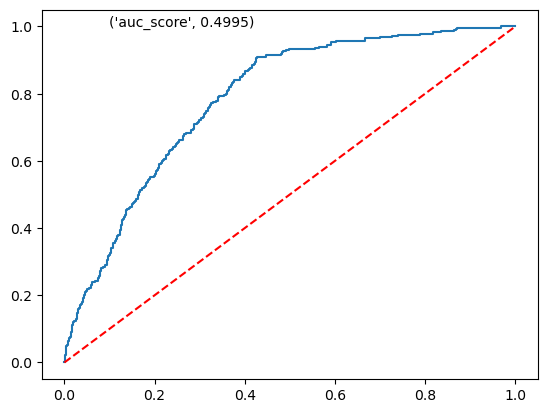

In [55]:
# Logistic Regression Model

model_lr = LogisticRegression().fit(X_train,Y_train)

evaluation(model_lr,'Logistic Regression Model')

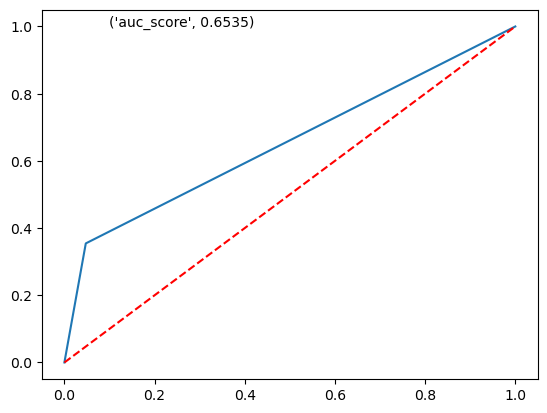

In [56]:
# DecisionTree Model without tuning

model_dt = DecisionTreeClassifier().fit(X_train,Y_train)

evaluation(model_dt,'DecisionTree Model')

## Decision Tree model with hyperparameter tuning

In [57]:
from sklearn.model_selection import KFold,GridSearchCV

In [71]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


Best parameters are : {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 150, 'min_samples_split': 2}


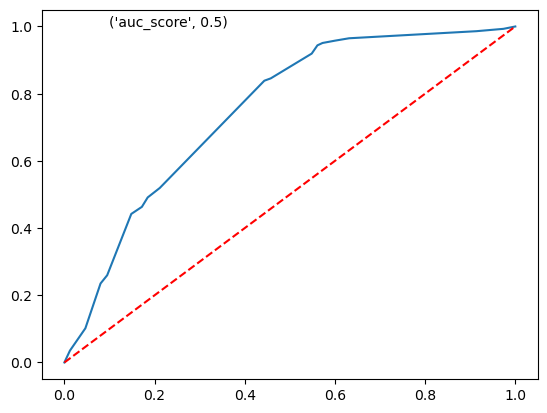

In [58]:


params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [150, 100, 50],
    'max_features': ['sqrt', 'log2', None],
    'criterion':['gini','entropy']
}

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = params).fit(X_train,Y_train)

print('Best parameters are :',grid_dt.best_params_)

model_dt_tuned = DecisionTreeClassifier(criterion = grid_dt.best_params_.get('criterion'),
                                       max_depth = grid_dt.best_params_.get('max_depth'),
                                       min_samples_leaf = grid_dt.best_params_.get('min_samples_leaf'),
                                       min_samples_split = grid_dt.best_params_.get('min_samples_split'),
                                       max_features = grid_dt.best_params_.get('max_features')).fit(X_train,Y_train)

evaluation(model_dt_tuned,name = 'Decision Tree Model with tuning')


## Random_Forest

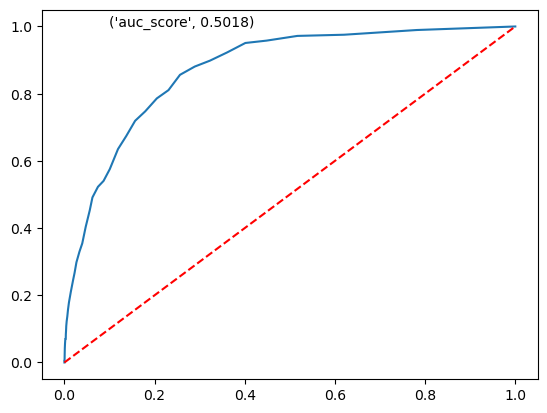

In [59]:


model_rf = RandomForestClassifier().fit(X_train,Y_train)

evaluation(model_rf,'RandomForest Model w/o tuning')

## HyperParameter tuning for Random_forest

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


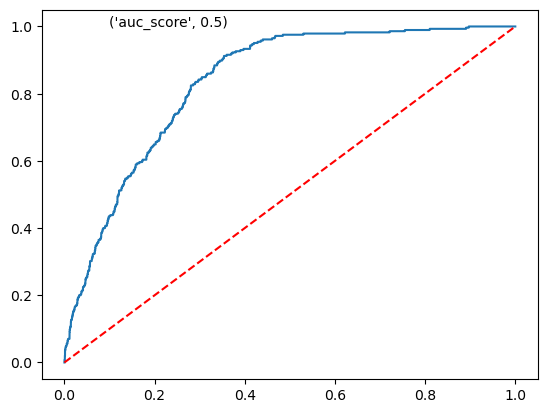

In [61]:


params = {
    'n_estimators': [10,15],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'criterion':['gini','entropy']
}

grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params).fit(X_train,Y_train)

print(grid_rf.best_params_)

model_rf_tuned = RandomForestClassifier(n_estimators= grid_rf.best_params_.get('n_estimators'),
                                       max_depth = grid_rf.best_params_.get('max_depth'),
                                       min_samples_split = grid_rf.best_params_.get('min_samples_split'),
                                       min_samples_leaf = grid_rf.best_params_.get('min_samples_leaf'),
                                       max_features = grid_rf.best_params_.get('max_features'),
                                       bootstrap = grid_rf.best_params_.get('bootstrap'),
                                       criterion = grid_rf.best_params_.get('criterion')).fit(X_train,Y_train)

evaluation(model_rf_tuned,'RandomForest Model with tuning')

## KNN 

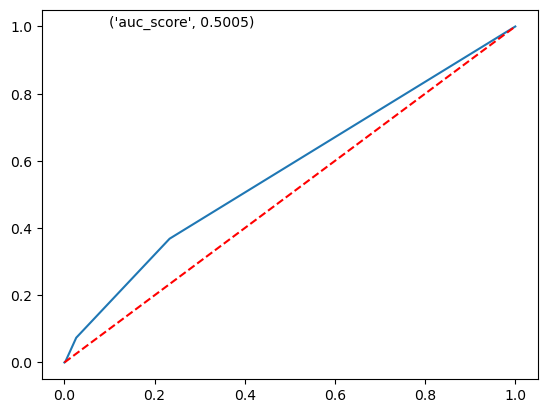

In [64]:


model_knn = KNeighborsClassifier().fit(X_train,Y_train)

evaluation(model_knn,'KNN Model w/o tuning')

## Hyper Parameter tuning for knn

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}


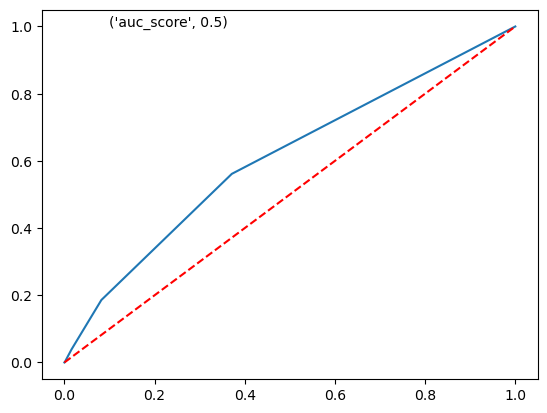

In [65]:

params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric' : ['Manhattan','Euclidean', 'minkowski']
}

grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params).fit(X_train,Y_train)

print(grid_knn.best_params_)

model_knn = KNeighborsClassifier(n_neighbors= grid_knn.best_params_.get('n_neighbors'),
                                weights = grid_knn.best_params_.get('weights'),
                                metric = grid_knn.best_params_.get('metric')).fit(X_train,Y_train)

evaluation(model_knn,'KNN Model with tuning')

## Adaboost

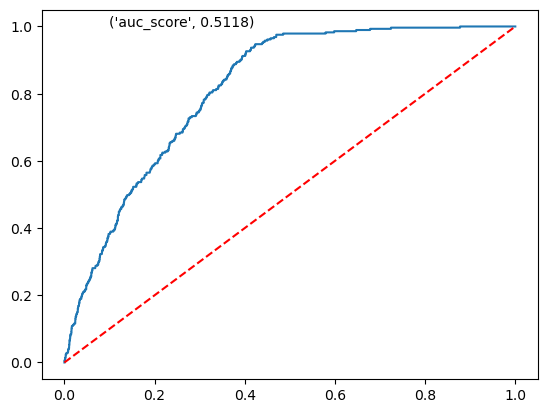

In [68]:
# AdaBoost Model w/o tuning

model_ab = AdaBoostClassifier().fit(X_train,Y_train)

evaluation(model_ab,name = 'AdaBoost Model w/o tuning')

## HyperParameter Tuning using Adaboost

Best parameters are : {'learning_rate': 0.01, 'n_estimators': 50}


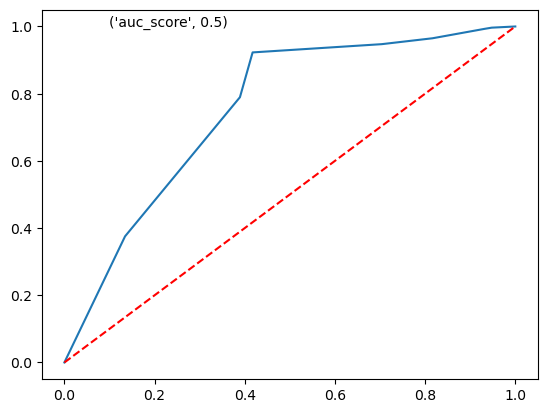

In [69]:
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_ab = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = params).fit(X_train,Y_train)

print('Best parameters are :',grid_ab.best_params_)

model_ab_tuned = AdaBoostClassifier(n_estimators = grid_ab.best_params_.get('n_estimators'),
                                   learning_rate = grid_ab.best_params_.get('learning_rate')).fit(X_train,Y_train)

evaluation(model_ab_tuned,name = 'AdaBoost Model with tuning')

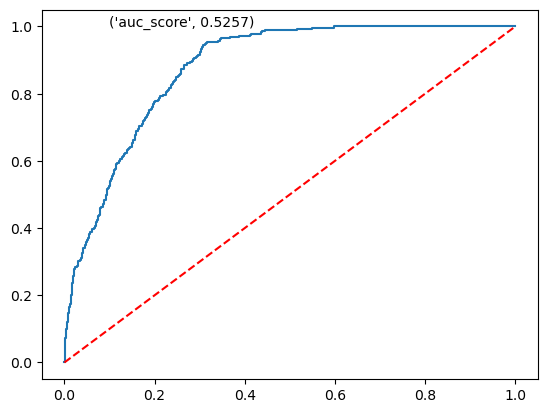

In [72]:
# Gradient Boosting Model

model_gb = GradientBoostingClassifier().fit(X_train,Y_train)

evaluation(model_gb, name = 'GradientBoosting Model w/o tuning')

Best parameters are : {'learning_rate': 0.1, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}


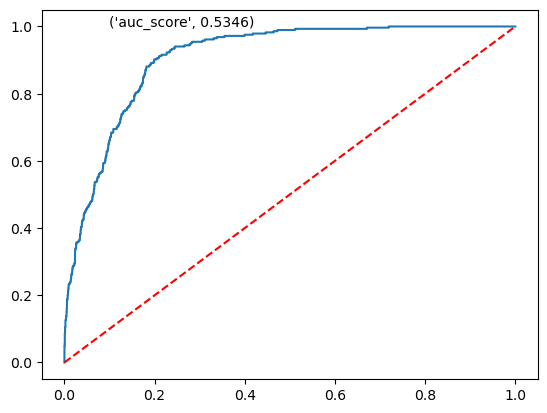

In [73]:
# Gradient Boosting Model with Hyperparameter tuning

params = {
    'n_estimators': [10,20,30],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_gb = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = params).fit(X_train,Y_train)

print('Best parameters are :',grid_gb.best_params_)

model_gb_tuned = GradientBoostingClassifier(n_estimators = grid_gb.best_params_.get('n_estimators'),
                                           learning_rate = grid_gb.best_params_.get('learning_rate'),
                                           max_depth = grid_gb.best_params_.get('max_depth'),
                                           min_samples_split = grid_gb.best_params_.get('min_samples_split'),
                                           min_samples_leaf = grid_gb.best_params_.get('min_samples_leaf'),
                                           max_features = grid_gb.best_params_.get('max_features')).fit(X_train,Y_train)

evaluation(model_gb_tuned, name = 'GradientBoosting Model with tuning')

In [78]:
cat=['DayOfWeekClaimed', 'MonthClaimed']

In [84]:
for i in cat:
    X_train[i]=X_train[i].astype(int)
    X_test[i]=X_test[i].astype(int)

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10794 entries, 13253 to 7270
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 10794 non-null  int64  
 1   WeekOfMonth           10794 non-null  float64
 2   DayOfWeek             10794 non-null  int64  
 3   Make                  10794 non-null  int64  
 4   AccidentArea          10794 non-null  int64  
 5   DayOfWeekClaimed      10794 non-null  int32  
 6   MonthClaimed          10794 non-null  int32  
 7   WeekOfMonthClaimed    10794 non-null  float64
 8   Sex                   10794 non-null  int64  
 9   MaritalStatus         10794 non-null  int64  
 10  Age                   10794 non-null  float64
 11  Fault                 10794 non-null  int64  
 12  PolicyType            10794 non-null  int64  
 13  VehicleCategory       10794 non-null  int64  
 14  VehiclePrice          10794 non-null  int64  
 15  PolicyNumber    

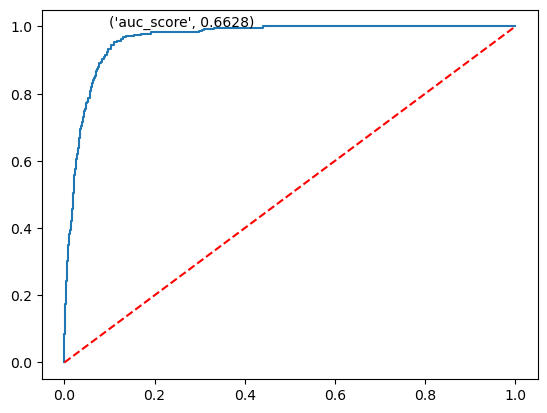

In [86]:
model_xgb = XGBClassifier().fit(X_train,Y_train)

evaluation(model_xgb,name = 'XGB Model w/o tuning')

Best parameters are : {'gamma': 0, 'learning_rate': 1, 'max_depth': 5, 'n_estimators': 75}


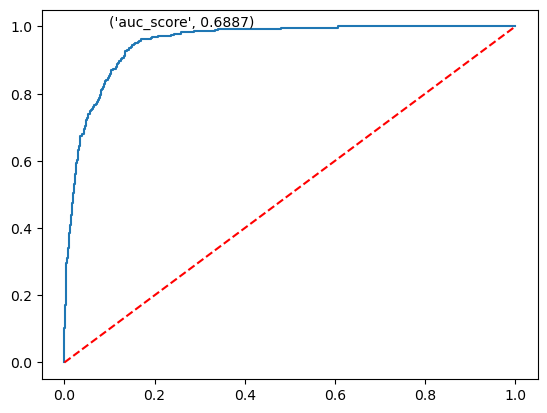

In [87]:
# XGB Model with Hyperparameter tuning

params = {
    'n_estimators': [25,50,75],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.5]
}

grid_xgb = GridSearchCV(estimator = XGBClassifier(), param_grid = params).fit(X_train,Y_train)

print('Best parameters are :',grid_xgb.best_params_)

model_xgb_tuned = XGBClassifier(n_estimators = grid_xgb.best_params_.get('n_estimators'),
                               learning_rate = grid_xgb.best_params_.get('learning_rate'),
                               max_depth = grid_xgb.best_params_.get('max_depth'),
                               gamma = grid_xgb.best_params_.get('gamma')).fit(X_train,Y_train)

evaluation(model_xgb_tuned,name = 'XGB Model with tuning')

In [89]:
performance_df

,Model_Name,Train_Accuracy,Train_F1score,Test_Accuracy,Test_F1score,AUC_Score,Remarks
0,Logistic Regression Model,0.940059,0.000000,0.937527,0.000000,0.499539,Good Fit
1,DecisionTree Model,1.000000,1.000000,0.915694,0.341216,0.653466,Overfit
2,Decision Tree Model with tuning,0.940893,0.000000,0.938392,0.000000,0.500000,Good Fit
3,RandomForest Model w/o tuning,0.999815,0.998430,0.938608,0.006993,0.501754,Overfit
4,RandomForest Model with tuning,0.945155,0.134503,0.938392,0.000000,0.500000,Good Fit
5,KNN Model w/o tuning,0.942839,0.093979,0.936230,0.006734,0.500487,Good Fit
6,KNN Model with tuning,0.941449,0.021672,0.938392,0.000000,0.500000,Good Fit
7,AdaBoost Model w/o tuning,0.937928,0.026163,0.936014,0.051282,0.511847,Good Fit
8,AdaBoost Model with tuning,0.940893,0.000000,0.938392,0.000000,0.500000,Good Fit
9,GradientBoosting Model w/o tuning,0.944506,0.117820,0.940553,0.098361,0.525740,Good Fit


In [ ]:
#logistic regression has best model as of now